# Importing libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score, roc_curve, precision_recall_curve , auc

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing datasets

In [147]:
file_path = "HeartDisease.csv"
df = pd.read_csv(file_path)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


# EDA

In [148]:
df.shape

(253680, 16)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [150]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

# Drop duplicates

In [151]:
df = df.drop_duplicates()
# df = df.sample(frac= 0.001)
print(df.shape)

(210828, 16)


# Univariate and Bivariate Distribution

In [152]:
HighBP = df["HighBP"].value_counts().reset_index()
HighBP

,index,HighBP
0,0.0,111827
1,1.0,99001


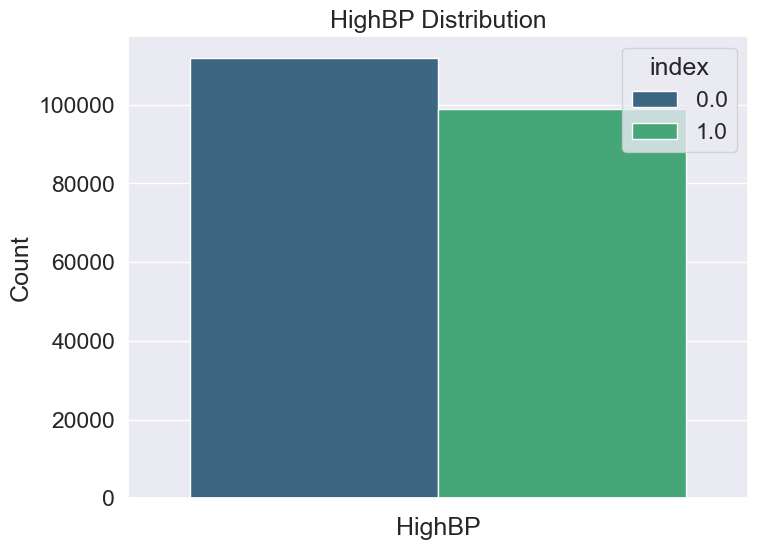

In [153]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='HighBP', data=HighBP, palette='viridis', legend = True)
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.title('HighBP Distribution')
plt.show()

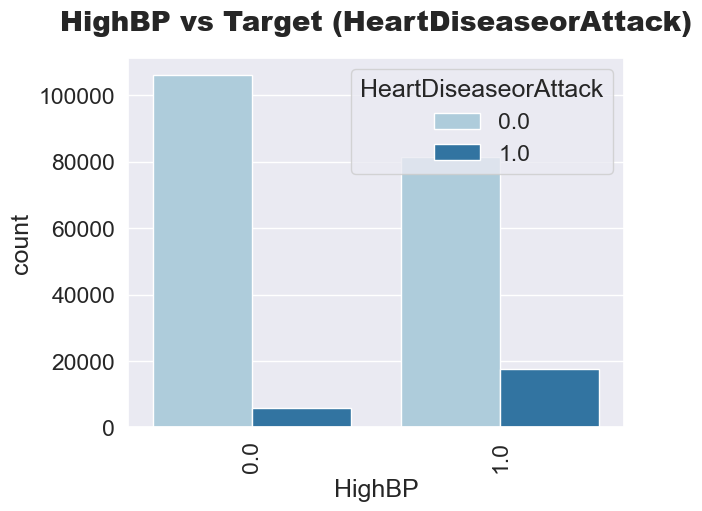

In [154]:
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['HighBP'].value_counts().index)
plt.title('HighBP vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [155]:
HighChol = df["HighChol"].value_counts().reset_index()
HighChol

,index,HighChol
0,0.0,115307
1,1.0,95521


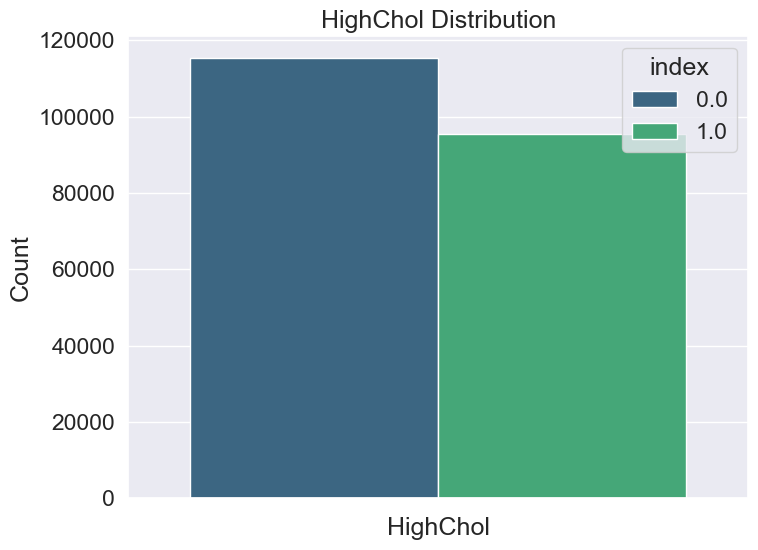

In [156]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='HighChol', data=HighChol, palette='viridis', legend = True)
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.title('HighChol Distribution')
plt.show()

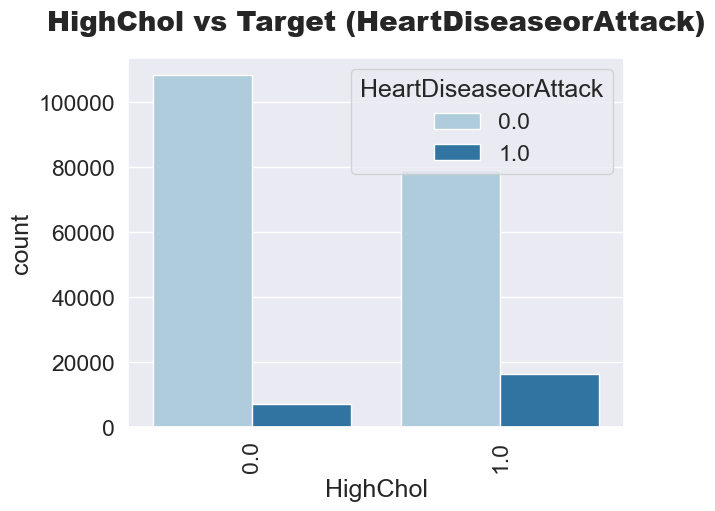

In [157]:
sns.countplot(x='HighChol', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['HighChol'].value_counts().index)
plt.title('HighChol vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [158]:
Smoker = df["Smoker"].value_counts().reset_index()
Smoker

,index,Smoker
0,0.0,110157
1,1.0,100671


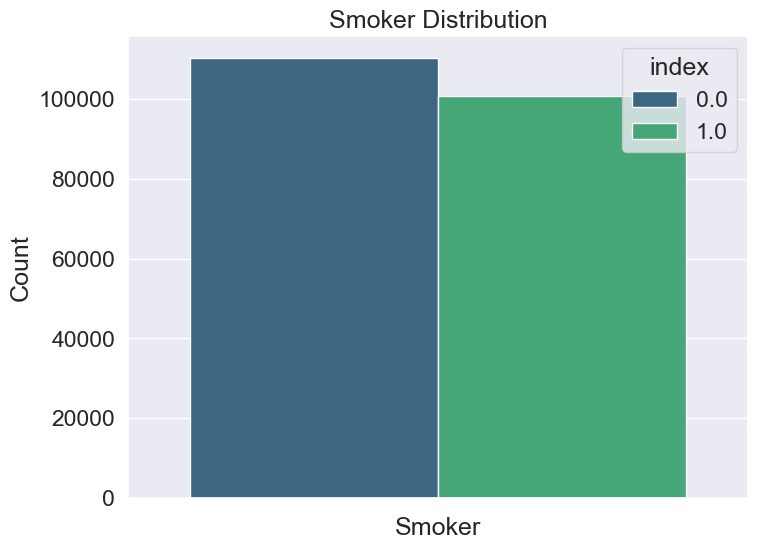

In [159]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Smoker', data=Smoker, palette='viridis', legend = True)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')
plt.show()

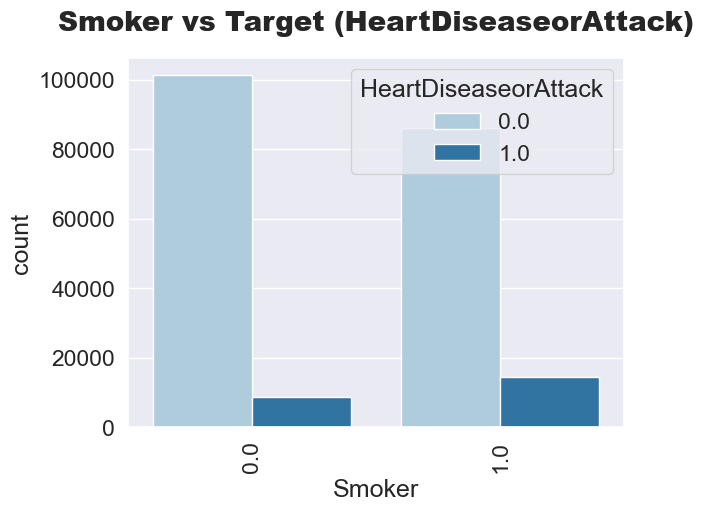

In [160]:
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Smoker'].value_counts().index)
plt.title('Smoker vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [161]:
Diabetes = df["Diabetes"].value_counts().reset_index()
Diabetes

,index,Diabetes
0,0.0,171612
1,2.0,34607
2,1.0,4609


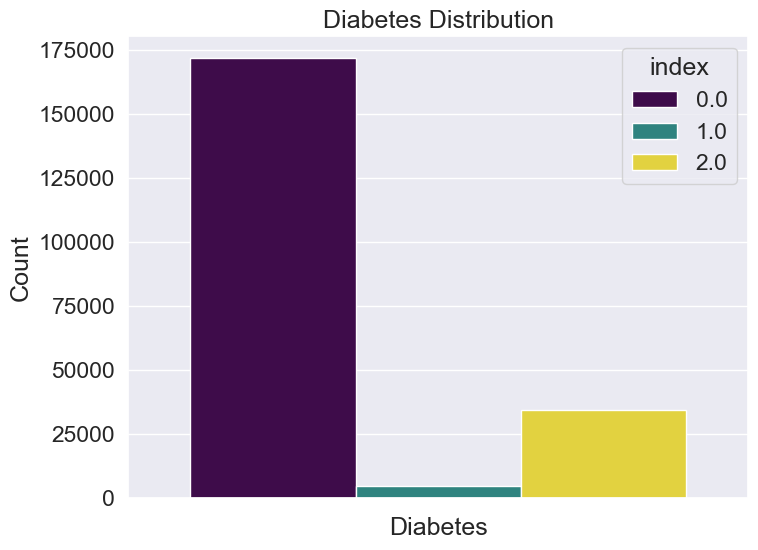

In [162]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Diabetes', data=Diabetes, palette='viridis', legend = True)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Distribution')
plt.show()

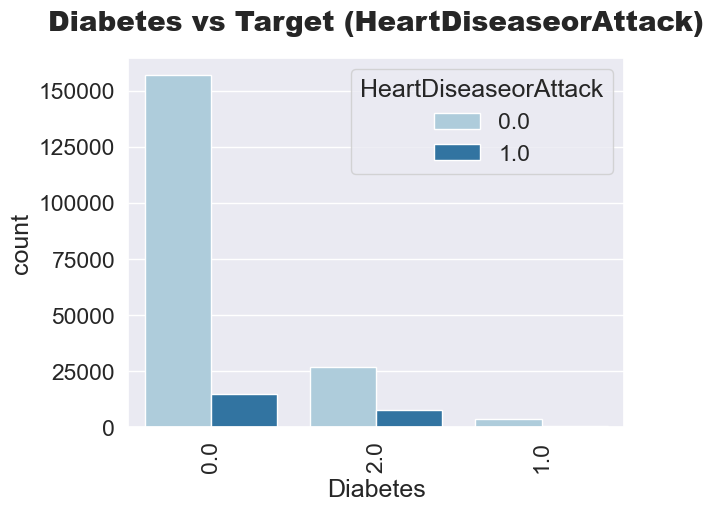

In [163]:
sns.countplot(x='Diabetes', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Diabetes'].value_counts().index)
plt.title('Diabetes vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [164]:
PhysActivity = df["PhysActivity"].value_counts().reset_index()
PhysActivity

,index,PhysActivity
0,1.0,150781
1,0.0,60047


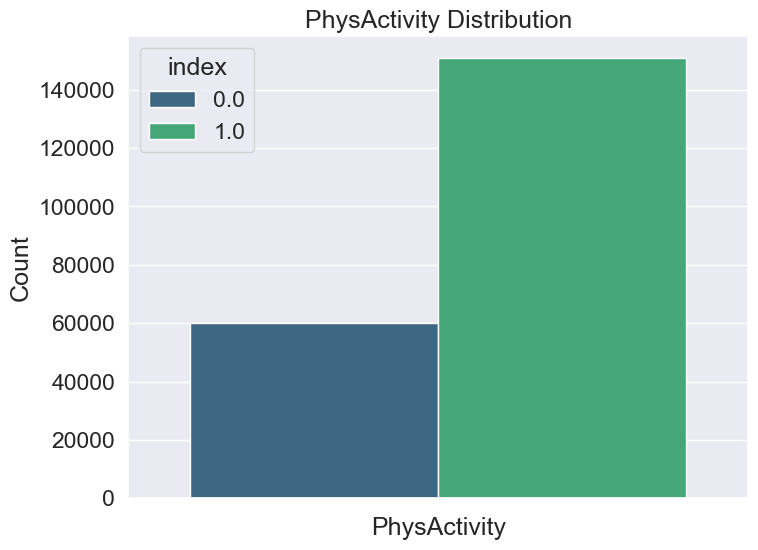

In [165]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='PhysActivity', data=PhysActivity, palette='viridis', legend = True)
plt.xlabel('PhysActivity')
plt.ylabel('Count')
plt.title('PhysActivity Distribution')
plt.show()

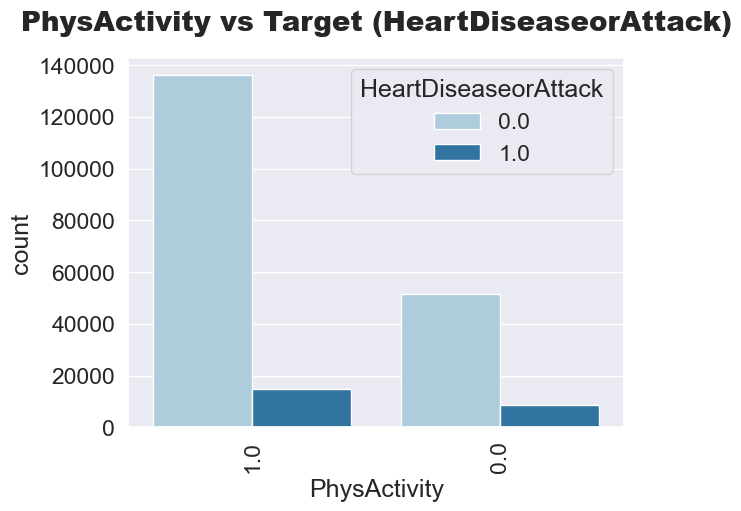

In [166]:
sns.countplot(x='PhysActivity', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['PhysActivity'].value_counts().index)
plt.title('PhysActivity vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [167]:
Fruits = df["Fruits"].value_counts().reset_index()
Fruits

,index,Fruits
0,1.0,126211
1,0.0,84617


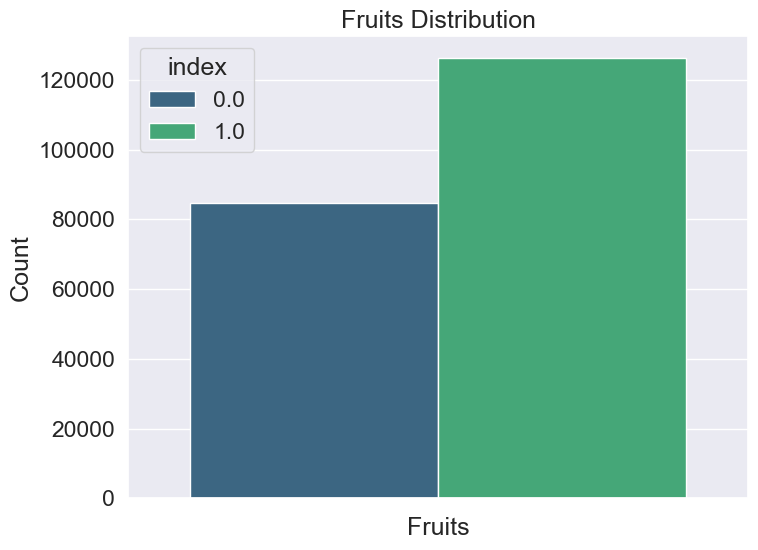

In [168]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Fruits', data=Fruits, palette='viridis', legend = True)
plt.xlabel('Fruits')
plt.ylabel('Count')
plt.title('Fruits Distribution')
plt.show()

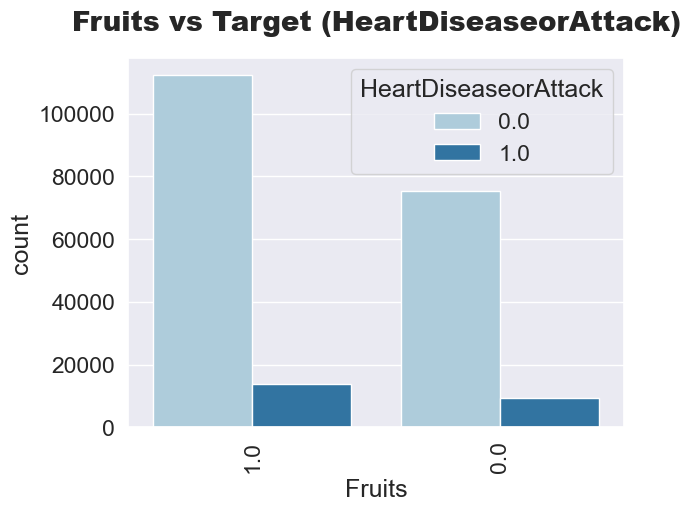

In [169]:
sns.countplot(x='Fruits', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Fruits'].value_counts().index)
plt.title('Fruits vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [170]:
Veggies = df["Veggies"].value_counts().reset_index()
Veggies

,index,Veggies
0,1.0,164886
1,0.0,45942


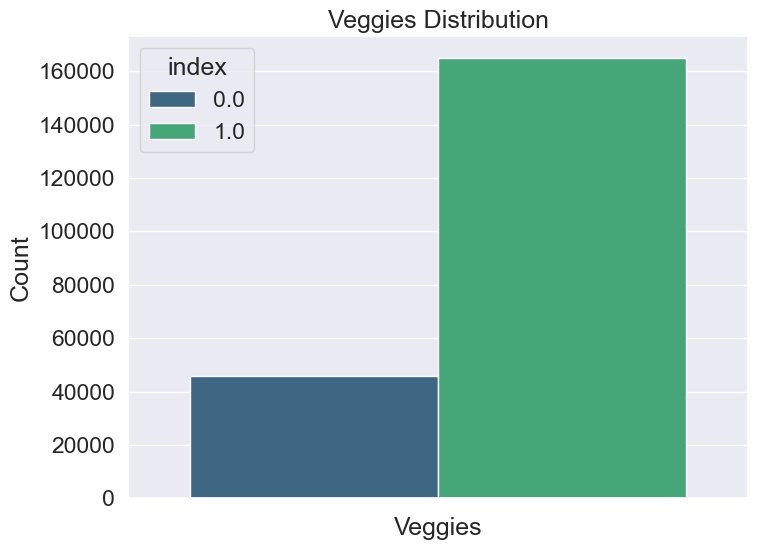

In [171]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Veggies', data=Veggies, palette='viridis', legend = True)
plt.xlabel('Veggies')
plt.ylabel('Count')
plt.title('Veggies Distribution')
plt.show()

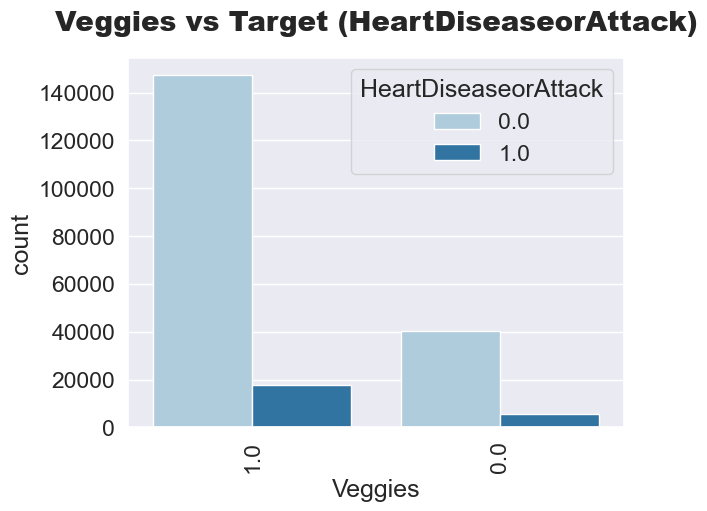

In [172]:
sns.countplot(x='Veggies', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Veggies'].value_counts().index)
plt.title('Veggies vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [173]:
HvyAlcoholConsump = df["HvyAlcoholConsump"].value_counts().reset_index()
HvyAlcoholConsump

,index,HvyAlcoholConsump
0,0.0,197237
1,1.0,13591


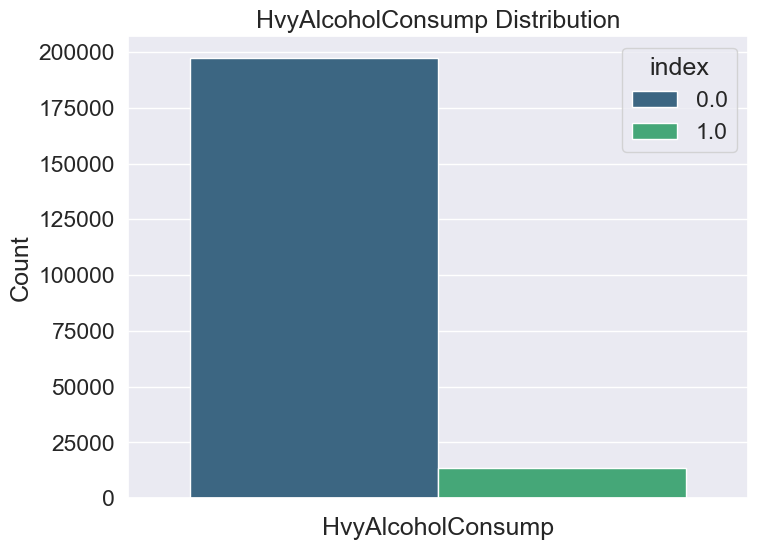

In [174]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='HvyAlcoholConsump', data=HvyAlcoholConsump, palette='viridis', legend = True)
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Count')
plt.title('HvyAlcoholConsump Distribution')
plt.show()

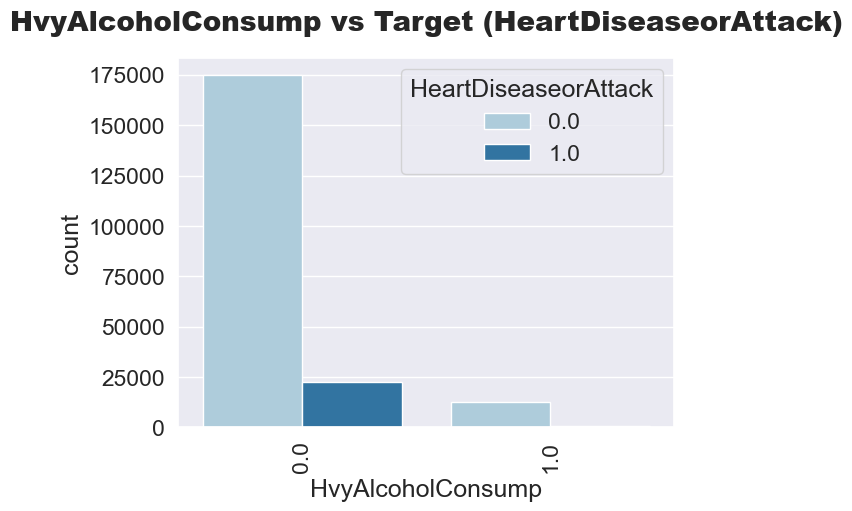

In [175]:
sns.countplot(x='HvyAlcoholConsump', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['HvyAlcoholConsump'].value_counts().index)
plt.title('HvyAlcoholConsump vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [176]:
Sex = df["Sex"].value_counts().reset_index()
Sex

,index,Sex
0,0.0,118854
1,1.0,91974


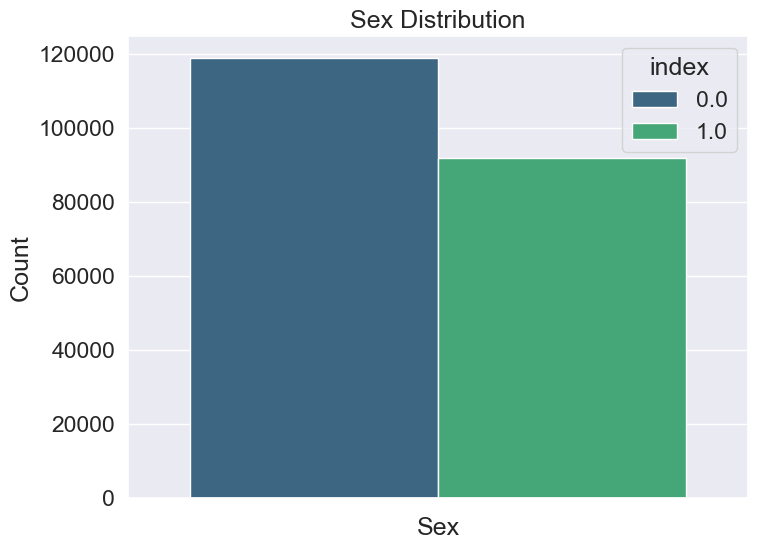

In [177]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Sex', data=Sex, palette='viridis', legend = True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

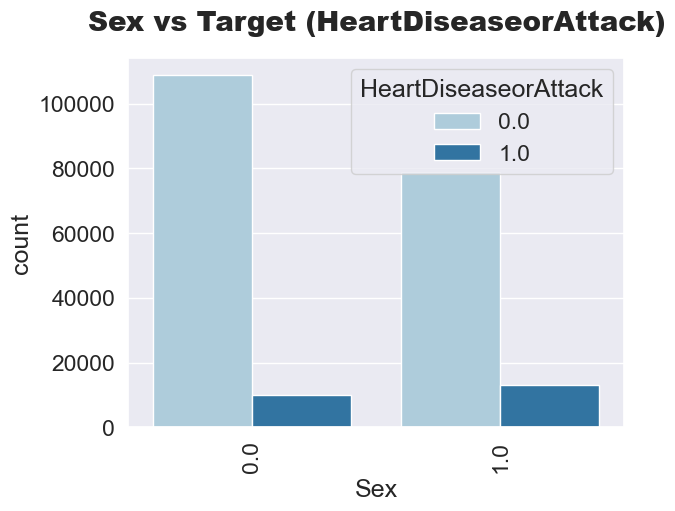

In [178]:
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Sex'].value_counts().index)
plt.title('Sex vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [179]:
Age = df["Age"].value_counts().reset_index()
Age

,index,Age
0,9.0,27159
1,10.0,26816
2,8.0,24876
3,7.0,21061
4,11.0,20428
5,6.0,15679
6,13.0,15651
7,12.0,14488
8,5.0,12691
9,4.0,11071


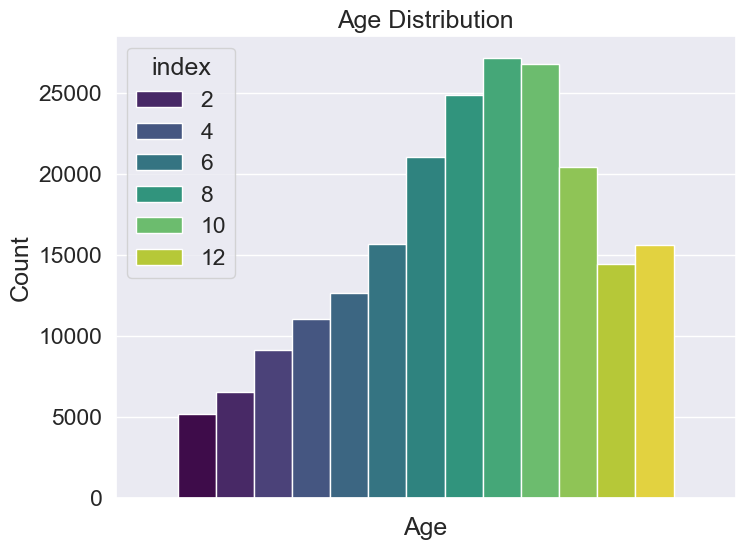

In [180]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Age', data=Age, palette='viridis', legend = True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

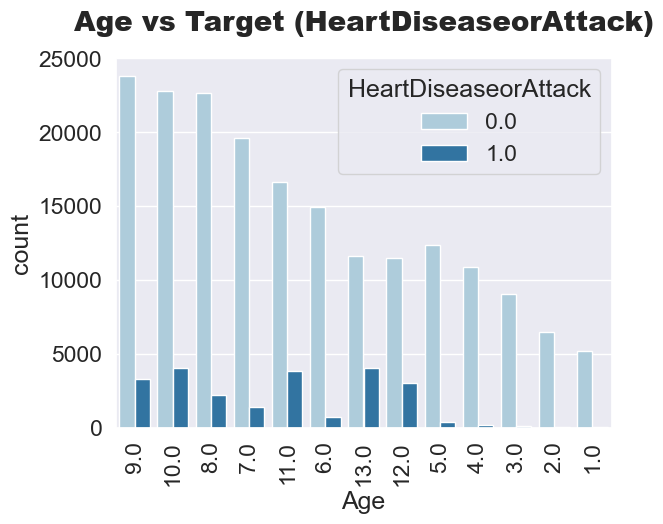

In [181]:
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Age'].value_counts().index)
plt.title('Age vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [182]:
Education = df["Education"].value_counts().reset_index()
Education

,index,Education
0,6.0,77023
1,5.0,62037
2,4.0,58146
3,3.0,9421
4,2.0,4027
5,1.0,174


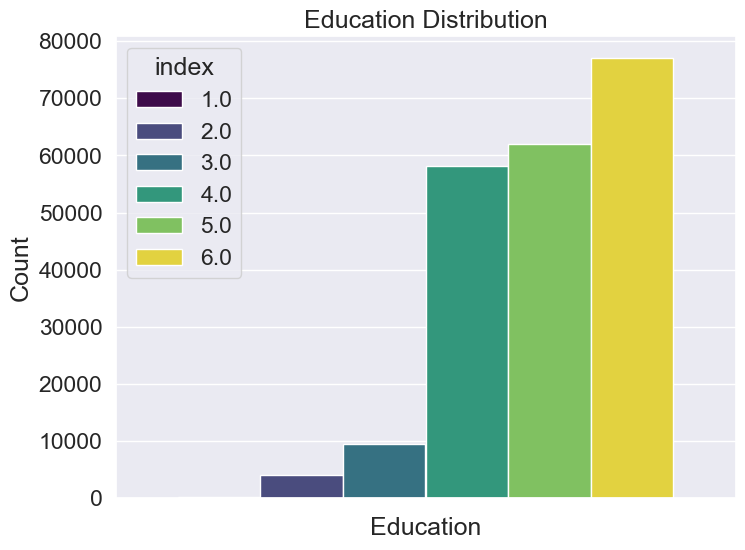

In [183]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Education', data=Education, palette='viridis', legend = True)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

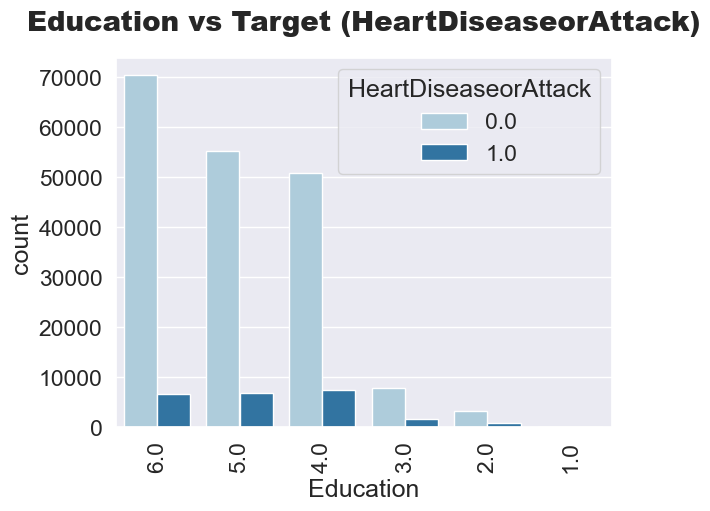

In [184]:
sns.countplot(x='Education', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Education'].value_counts().index)
plt.title('Education vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [185]:
Income = df["Income"].value_counts().reset_index()
Income

,index,Income
0,8.0,61125
1,7.0,36567
2,6.0,32534
3,5.0,24229
4,4.0,19369
5,3.0,15623
6,2.0,11651
7,1.0,9730


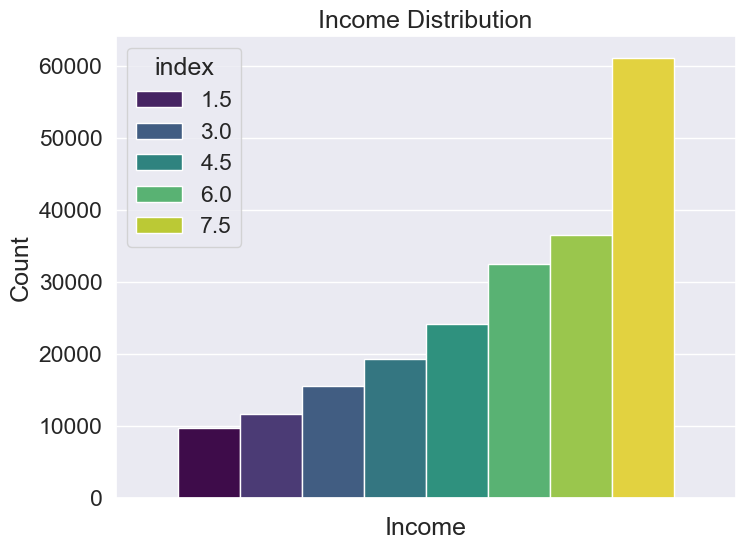

In [186]:
plt.figure(figsize=(8, 6))
sns.barplot(hue='index', y='Income', data=Income, palette='viridis', legend = True)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

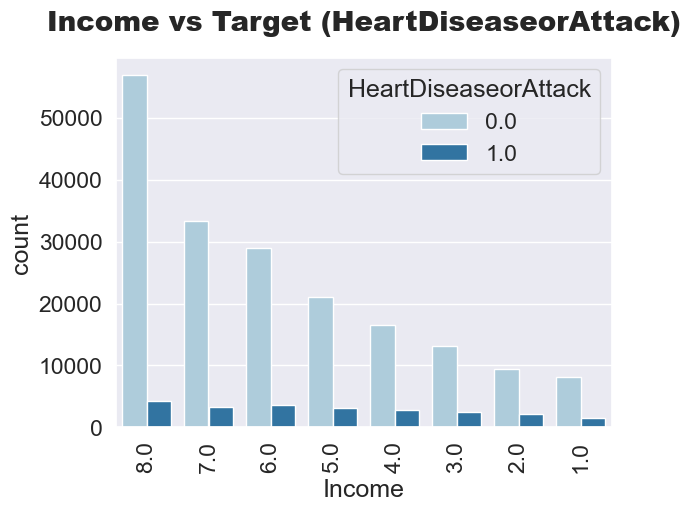

In [187]:
sns.countplot(x='Income', hue='HeartDiseaseorAttack', data=df, palette='Paired', order=df['Income'].value_counts().index)
plt.title('Income vs Target (HeartDiseaseorAttack)', fontweight='black', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Correlation check

Text(0.5, 1.0, 'Correlation Matrix')

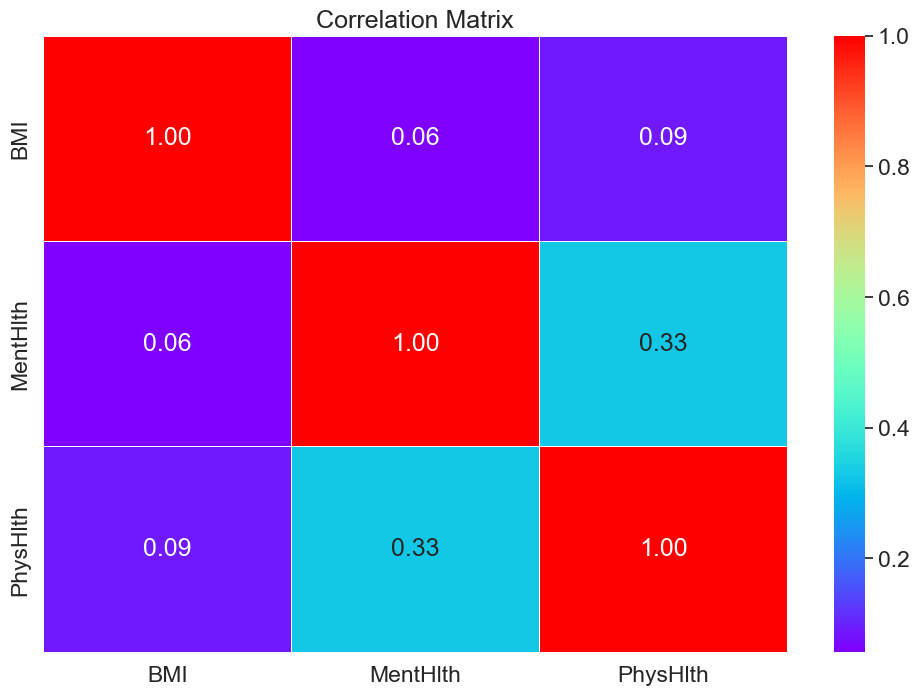

In [188]:
numeric_columns = ["BMI","MentHlth","PhysHlth"]
numeric_df = df[numeric_columns]
categorical_columns = list(set(df.columns.to_list()) -  set(numeric_columns))
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

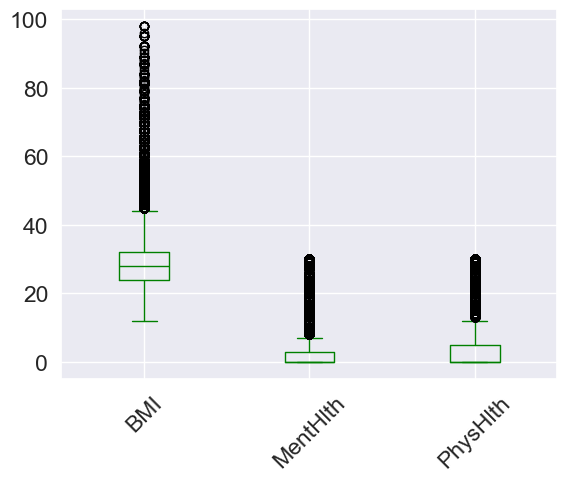

In [189]:
numeric_df.plot(kind='box', rot=45,color='green')

plt.show()

Sex
Axes(0.125,0.11;0.775x0.77)


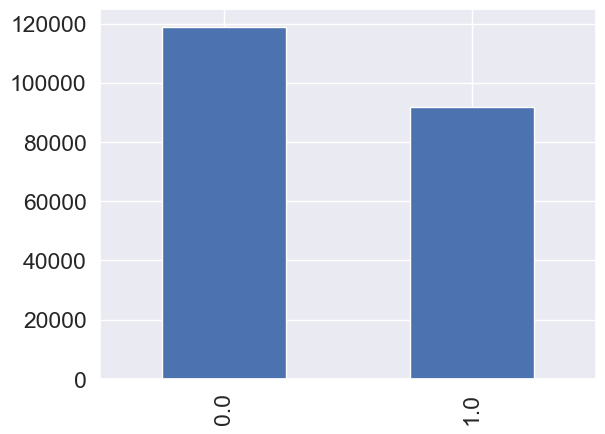

--------------------
Education
Axes(0.125,0.11;0.775x0.77)


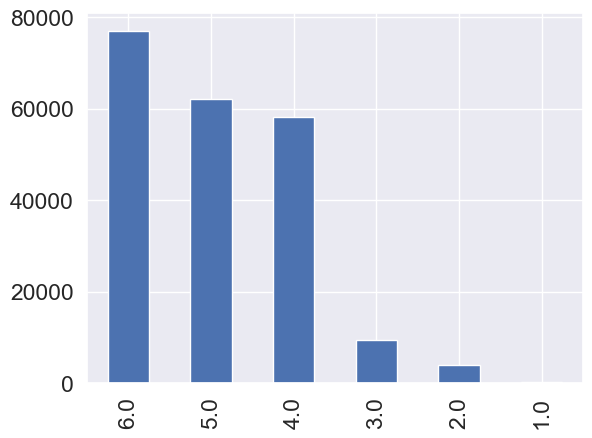

--------------------
HvyAlcoholConsump
Axes(0.125,0.11;0.775x0.77)


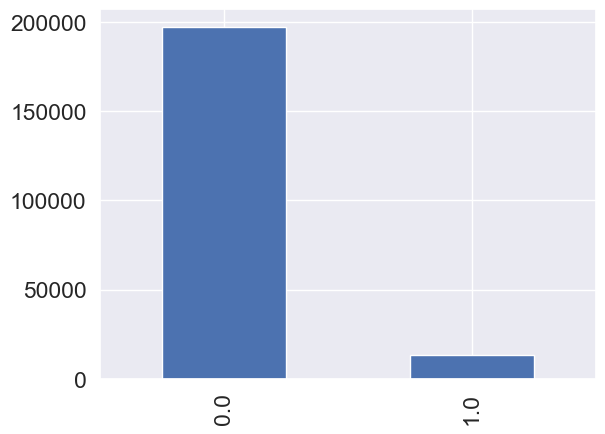

--------------------
HighBP
Axes(0.125,0.11;0.775x0.77)


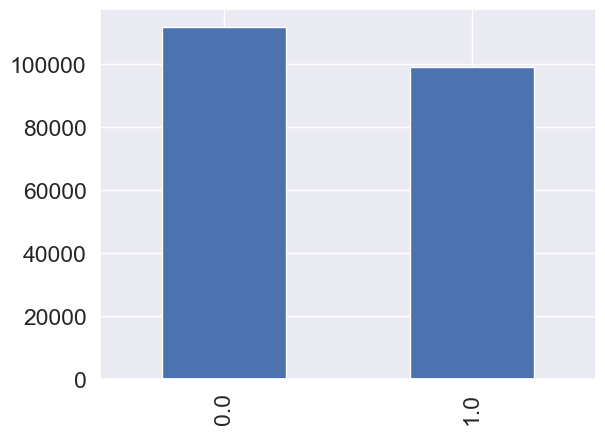

--------------------
Income
Axes(0.125,0.11;0.775x0.77)


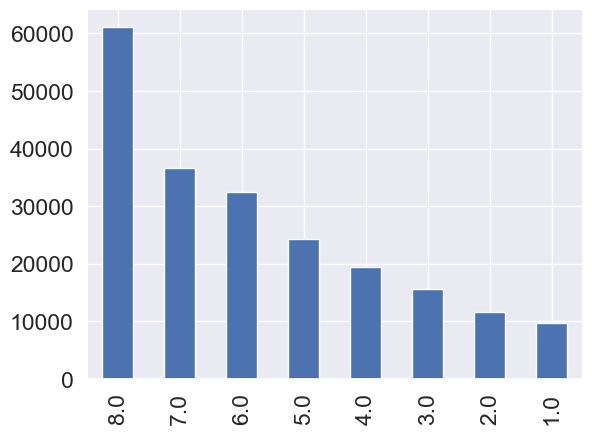

--------------------
Fruits
Axes(0.125,0.11;0.775x0.77)


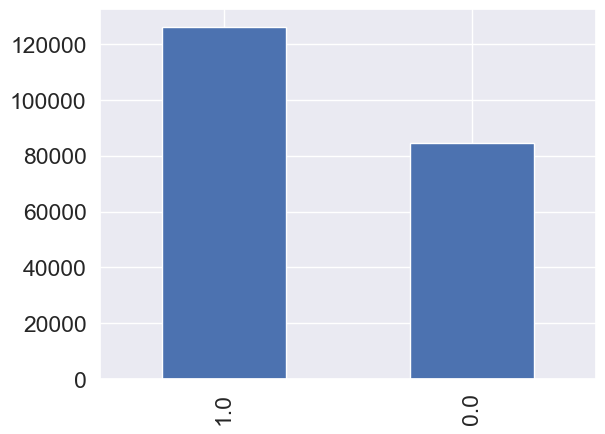

--------------------
Age
Axes(0.125,0.11;0.775x0.77)


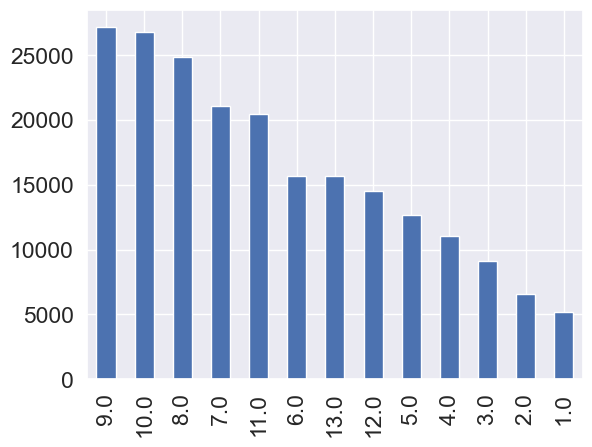

--------------------
Veggies
Axes(0.125,0.11;0.775x0.77)


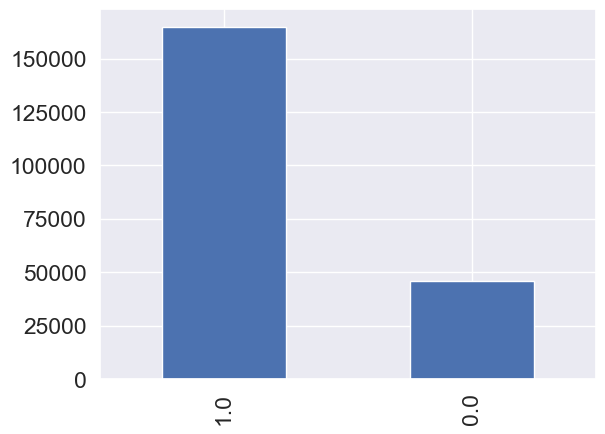

--------------------
HeartDiseaseorAttack
Axes(0.125,0.11;0.775x0.77)


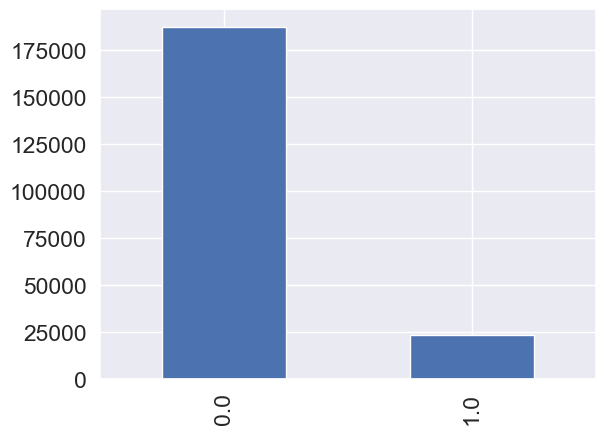

--------------------
Diabetes
Axes(0.125,0.11;0.775x0.77)


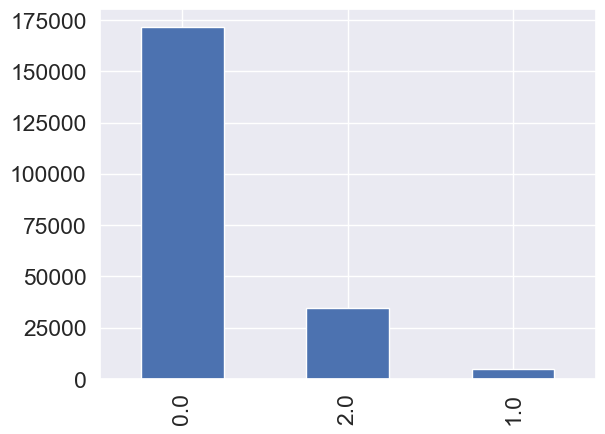

--------------------
Smoker
Axes(0.125,0.11;0.775x0.77)


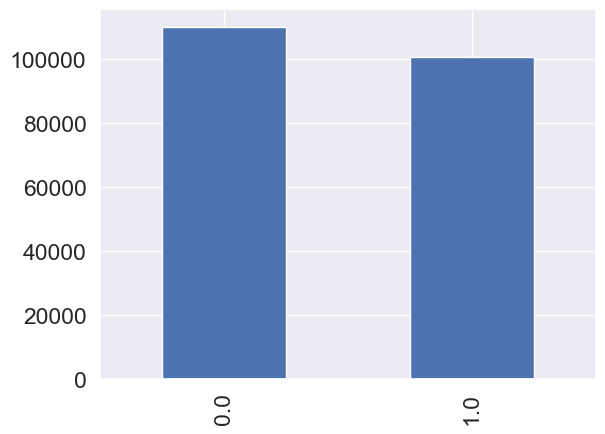

--------------------
PhysActivity
Axes(0.125,0.11;0.775x0.77)


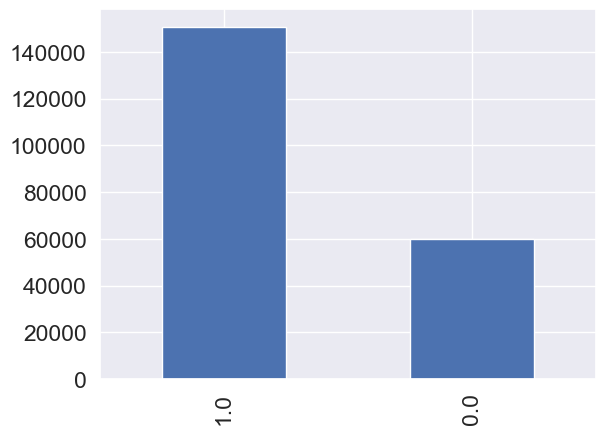

--------------------
HighChol
Axes(0.125,0.11;0.775x0.77)


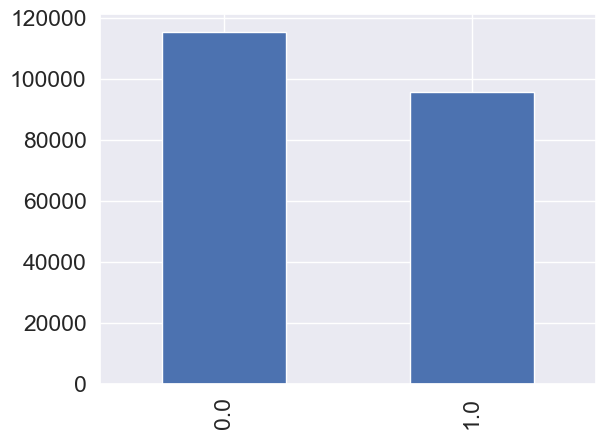

--------------------


In [190]:
for col in categorical_columns:
    print(col)
    print(df[col].value_counts().plot(kind="bar"))
    plt.show()
    print("--------------------")

# chi-square test on categorical variables

In [138]:
lst = []
for col in categorical_columns:
    lst.append(col)
cat_var1 = set(lst)
cat_var2 = set(lst)
# ## Let us jump to Chi-Square test
# ## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
cat_var_prod

[('HeartDiseaseorAttack', 'HeartDiseaseorAttack'),
 ('HeartDiseaseorAttack', 'Sex'),
 ('HeartDiseaseorAttack', 'Education'),
 ('HeartDiseaseorAttack', 'Diabetes'),
 ('HeartDiseaseorAttack', 'HvyAlcoholConsump'),
 ('HeartDiseaseorAttack', 'Smoker'),
 ('HeartDiseaseorAttack', 'PhysActivity'),
 ('HeartDiseaseorAttack', 'Income'),
 ('HeartDiseaseorAttack', 'HighBP'),
 ('HeartDiseaseorAttack', 'HighChol'),
 ('HeartDiseaseorAttack', 'Fruits'),
 ('HeartDiseaseorAttack', 'Age'),
 ('HeartDiseaseorAttack', 'Veggies'),
 ('Sex', 'HeartDiseaseorAttack'),
 ('Sex', 'Sex'),
 ('Sex', 'Education'),
 ('Sex', 'Diabetes'),
 ('Sex', 'HvyAlcoholConsump'),
 ('Sex', 'Smoker'),
 ('Sex', 'PhysActivity'),
 ('Sex', 'Income'),
 ('Sex', 'HighBP'),
 ('Sex', 'HighChol'),
 ('Sex', 'Fruits'),
 ('Sex', 'Age'),
 ('Sex', 'Veggies'),
 ('Education', 'HeartDiseaseorAttack'),
 ('Education', 'Sex'),
 ('Education', 'Education'),
 ('Education', 'Diabetes'),
 ('Education', 'HvyAlcoholConsump'),
 ('Education', 'Smoker'),
 ('Educati

In [141]:
categorical_columns

['Sex',
 'Education',
 'HvyAlcoholConsump',
 'HighBP',
 'Income',
 'Fruits',
 'Age',
 'Veggies',
 'HeartDiseaseorAttack',
 'Diabetes',
 'Smoker',
 'PhysActivity',
 'HighChol']

In [140]:
df_cat_v1 = df[categorical_columns]
df_cat_v1.head()

,Sex,Education,HvyAlcoholConsump,HighBP,Income,Fruits,Age,Veggies,HeartDiseaseorAttack,Diabetes,Smoker,PhysActivity,HighChol
184600,1.0,5.0,0.0,1.0,8.0,0.0,6.0,1.0,0.0,2.0,0.0,1.0,1.0
12548,0.0,4.0,0.0,1.0,5.0,0.0,8.0,1.0,0.0,2.0,1.0,0.0,0.0
68525,0.0,6.0,0.0,1.0,5.0,1.0,12.0,1.0,0.0,2.0,1.0,0.0,0.0
117454,0.0,5.0,0.0,1.0,8.0,1.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0
177767,1.0,4.0,0.0,1.0,6.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0


In [142]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))
result

[('HeartDiseaseorAttack', 'Sex', 0.774608388834559),
 ('HeartDiseaseorAttack', 'Education', 0.7706476320447648),
 ('HeartDiseaseorAttack', 'Diabetes', 0.001508642142333952),
 ('HeartDiseaseorAttack', 'HvyAlcoholConsump', 1.0),
 ('HeartDiseaseorAttack', 'Smoker', 0.12073086481708732),
 ('HeartDiseaseorAttack', 'PhysActivity', 0.3380857189760013),
 ('HeartDiseaseorAttack', 'Income', 0.42471431030919937),
 ('HeartDiseaseorAttack', 'HighBP', 0.007550654647921121),
 ('HeartDiseaseorAttack', 'HighChol', 0.3415111638416723),
 ('HeartDiseaseorAttack', 'Fruits', 0.3569947709724459),
 ('HeartDiseaseorAttack', 'Age', 0.1064870574029395),
 ('HeartDiseaseorAttack', 'Veggies', 0.8651289558994222),
 ('Sex', 'HeartDiseaseorAttack', 0.774608388834559),
 ('Sex', 'Education', 0.20358649115587935),
 ('Sex', 'Diabetes', 0.9533351218663589),
 ('Sex', 'HvyAlcoholConsump', 0.7153186378462122),
 ('Sex', 'Smoker', 0.8247231164346149),
 ('Sex', 'PhysActivity', 0.7194641758607909),
 ('Sex', 'Income', 0.1015631218

In [145]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns = 'var2', values='coeff')

var2,Age,Diabetes,Education,Fruits,HeartDiseaseorAttack,HighBP,HighChol,HvyAlcoholConsump,Income,PhysActivity,Sex,Smoker,Veggies
var1,,,,,,,,,,,,,
Age,NaN,0.270085,0.535737,0.774832,0.106487,0.000027,0.059903,0.546324,0.304444,0.505578,0.739748,0.038732,0.398408
Diabetes,0.270085,NaN,0.133139,0.309573,0.001509,0.000060,0.321075,0.678144,0.754710,0.188169,0.953335,0.250897,0.117671
Education,0.535737,0.133139,NaN,0.449069,0.770648,0.164390,0.096478,0.331594,0.000001,0.170454,0.203586,0.036057,0.109530
Fruits,0.774832,0.309573,0.449069,NaN,0.356995,0.773079,0.625780,0.151027,0.988199,0.977693,1.000000,0.330124,0.041520
HeartDiseaseorAttack,0.106487,0.001509,0.770648,0.356995,NaN,0.007551,0.341511,1.000000,0.424714,0.338086,0.774608,0.120731,0.865129
HighBP,0.000027,0.000060,0.164390,0.773079,0.007551,NaN,0.000018,0.321637,0.830334,0.008848,1.000000,0.158657,0.784208
HighChol,0.059903,0.321075,0.096478,0.625780,0.341511,0.000018,NaN,0.796348,0.263566,0.649727,0.716166,0.482648,0.434178
HvyAlcoholConsump,0.546324,0.678144,0.331594,0.151027,1.000000,0.321637,0.796348,NaN,0.837476,0.433560,0.715319,0.088553,0.744478
Income,0.304444,0.754710,0.000001,0.988199,0.424714,0.830334,0.263566,0.837476,NaN,0.003292,0.101563,0.381909,0.574254


# Model Building

In [72]:
X = df.drop(['HeartDiseaseorAttack'],axis=1)
y = df['HeartDiseaseorAttack']

# Oversampling

In [44]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(len(X_res),len(y_res))
y_res.value_counts()

374970 374970


0.0    187485
1.0    187485
Name: HeartDiseaseorAttack, dtype: int64

In [45]:
X_train,X_val,y_train,y_val = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [46]:
print('X_train shape -->', X_train.shape)
print('X_val shape -->', X_val.shape)
print('y_train shape -->', y_train.shape)
print('y_val shape -->', y_val.shape)

X_train shape --> (262479, 15)
X_val shape --> (112491, 15)
y_train shape --> (262479,)
y_val shape --> (112491,)


# Logistic Regression - oversampling

In [47]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_val)

lr_Acu = accuracy_score(y_val, y_pred_lr)*100
lr_f1 = f1_score(y_val, y_pred_lr)
lr_roc_auc_score = roc_auc_score(y_val, Logistic_Regression.predict_proba(X_val)[:,1])*100

print( "AUROC OF Logistic Regression : ", roc_auc_score(y_val, Logistic_Regression.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)

AUROC OF Logistic Regression :  81.81353713874941
F1 SCORE OF Logistic Regression :  0.7582067634829973
Accuracy OF Logistic Regression :  74.8237636788721


In [48]:
cmL = confusion_matrix(y_val, y_pred_lr)
cmL

array([[39766, 16486],
       [11835, 44404]], dtype=int64)

### auc-roc curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.818


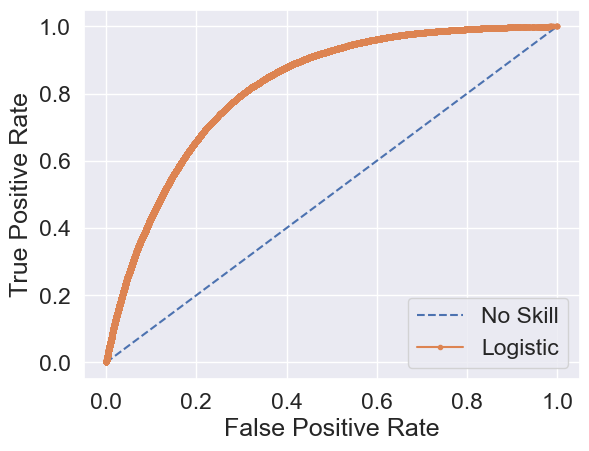

In [52]:
ns_probs = [0 for _ in range(len(y_val))]
lr_probs = Logistic_Regression.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### precision - recall curve

Logistic: f1=0.761 auc=0.783


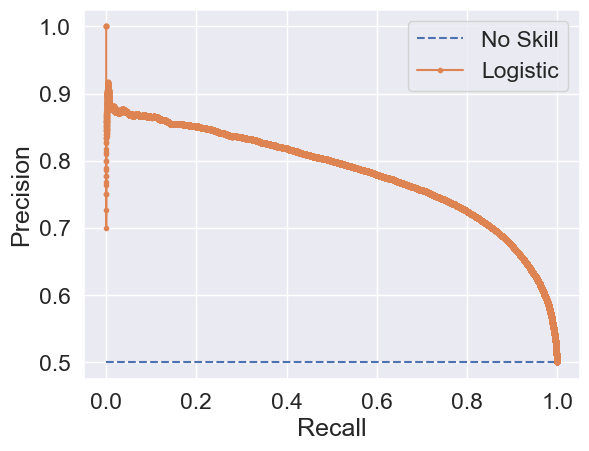

In [91]:
lr_probs = Logistic_Regression.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
# predict class values
y_pred_lr = Logistic_Regression.predict(X_val)
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
lr_f1, lr_auc = f1_score(y_val, y_pred_lr), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Undersampling

In [92]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print(len(X_res),len(y_res))
y_res.value_counts()

46686 46686


0.0    23343
1.0    23343
Name: HeartDiseaseorAttack, dtype: int64

In [93]:
X_train,X_val,y_train,y_val = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [94]:
print('X_train shape -->', X_train.shape)
print('X_val shape -->', X_val.shape)
print('y_train shape -->', y_train.shape)
print('y_val shape -->', y_val.shape)

X_train shape --> (32680, 15)
X_val shape --> (14006, 15)
y_train shape --> (32680,)
y_val shape --> (14006,)


# Logistic Regression

In [95]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_val)

lr_Acu = accuracy_score(y_val, y_pred_lr)*100
lr_f1 = f1_score(y_val, y_pred_lr)
lr_roc_auc_score = roc_auc_score(y_val, Logistic_Regression.predict_proba(X_val)[:,1])*100

print( "AUROC OF Logistic Regression : ", roc_auc_score(y_val, Logistic_Regression.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)

AUROC OF Logistic Regression :  80.74847754517408
F1 SCORE OF Logistic Regression :  0.7421939762365294
Accuracy OF Logistic Regression :  73.35427673854062


In [96]:
cmL = confusion_matrix(y_val, y_pred_lr)
cmL

array([[4902, 2119],
       [1613, 5372]], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.807


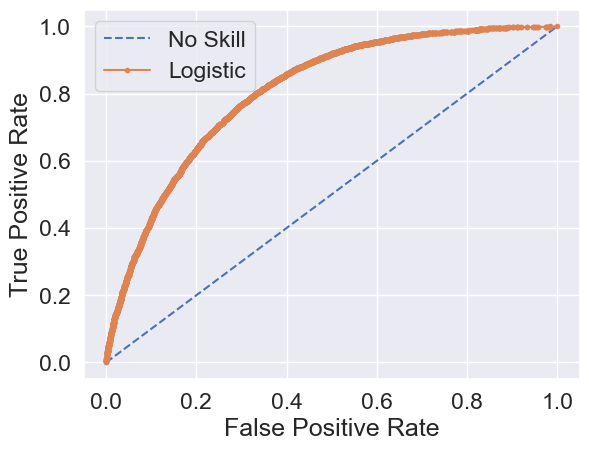

In [97]:
ns_probs = [0 for _ in range(len(y_val))]
lr_probs = Logistic_Regression.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.742 auc=0.780


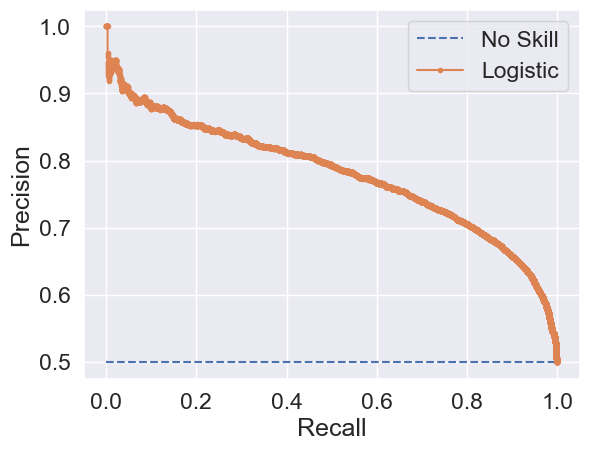

In [98]:
lr_probs = Logistic_Regression.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
# predict class values
y_pred_lr = Logistic_Regression.predict(X_val)
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
lr_f1, lr_auc = f1_score(y_val, y_pred_lr), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### since, undersampling accuracy is lesser than the oversampling accuracy, we will go with the undersampling accuracy

# Decision Tree

In [99]:
X = df.drop(['HeartDiseaseorAttack'],axis=1)
y = df['HeartDiseaseorAttack']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train,X_val,y_train,y_val = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [83]:
for depth in [6,8,10,12, 14, 16]:
    Decision_Tree = DecisionTreeClassifier(max_depth=depth)
    Decision_Tree.fit(X_train, y_train)
    valAccuracy = cross_val_score(Decision_Tree, X_val, y_val, cv=10)
    print("Depth  : ", depth,"---------", " Cross val score : " ,np.mean(valAccuracy))

Depth  :  6 ---------  Cross val score :  0.8181187913987416
Depth  :  8 ---------  Cross val score :  0.8473922304204817
Depth  :  10 ---------  Cross val score :  0.8623178704279887
Depth  :  12 ---------  Cross val score :  0.8747721828113116
Depth  :  14 ---------  Cross val score :  0.8806571234973972
Depth  :  16 ---------  Cross val score :  0.882719536946494


In [100]:
Decision_Tree = DecisionTreeClassifier(max_depth=16)
Decision_Tree.fit(X_train, y_train)
y_pred_dt = Decision_Tree.predict(X_val)

dt_Acu = accuracy_score(y_val, y_pred_dt)*100
dt_f1 = f1_score(y_val, y_pred_dt)
dt_roc_auc_score = roc_auc_score(y_val, Decision_Tree.predict_proba(X_val)[:,1])*100

print( "AUROC OF Sampled Decision_Tree  : ", roc_auc_score(y_val, Decision_Tree.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Decision_Tree : ", dt_f1 )
print("Accuracy OF Decision_Tree : ", dt_Acu )

AUROC OF Sampled Decision_Tree  :  95.4546950919565
F1 SCORE OF Decision_Tree :  0.8916811567676398
Accuracy OF Decision_Tree :  89.47826937266092


In [101]:
cmD = confusion_matrix(y_val, y_pred_dt)
cmD

array([[51938,  4314],
       [ 7522, 48717]], dtype=int64)

No Skill: ROC AUC=0.500
Decision_Tree: ROC AUC=0.955


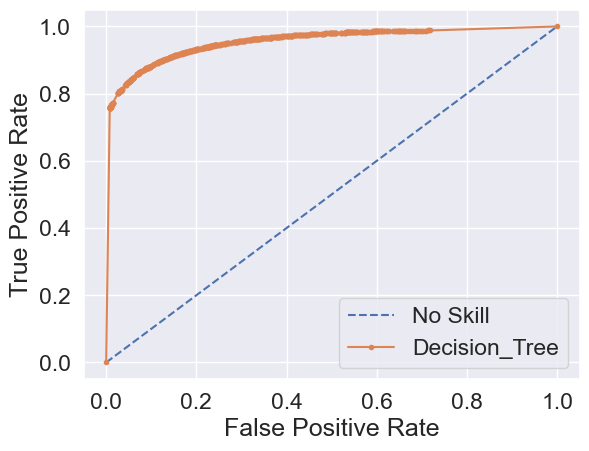

In [102]:
ns_probs = [0 for _ in range(len(y_val))]
dt_probs = Decision_Tree.predict_proba(X_val)
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
dt_auc = roc_auc_score(y_val, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision_Tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision_Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### preciosn-recall curve

Decision_Tree: f1=0.892 auc=0.963


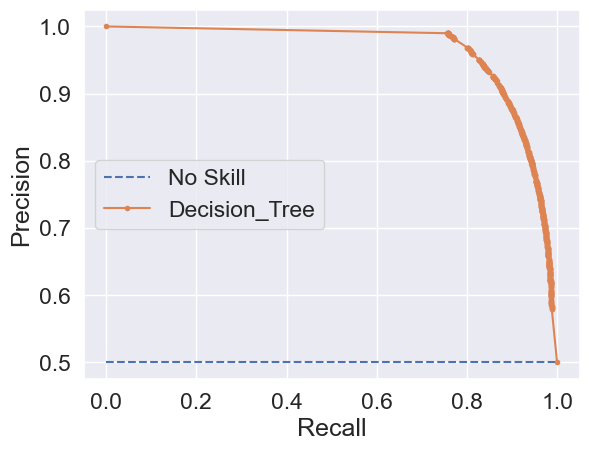

In [103]:
dt_probs = Decision_Tree.predict_proba(X_val)
dt_probs = dt_probs[:, 1]
# predict class values
y_pred_dt = Decision_Tree.predict(X_val)
dt_precision, dt_recall, _ = precision_recall_curve(y_val, dt_probs)
dt_f1, dt_auc = f1_score(y_val, y_pred_dt), auc(dt_recall, dt_precision)
# summarize scores
print('Decision_Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(dt_recall, dt_precision, marker='.', label='Decision_Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Random Forest

In [104]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_val)


rf_Acu = accuracy_score(y_val, y_pred_rf)*100
rf_f1 = f1_score(y_val, y_pred_rf)
rf_roc_auc_score = roc_auc_score(y_val, Random_Forest.predict_proba(X_val)[:,1])*100

print( "AUROC OF Sampled Random_Forest  : ", roc_auc_score(y_val, Random_Forest.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Random_Forest : ", rf_f1 )
print("Accuracy OF Random_Forest : ", rf_Acu)

AUROC OF Sampled Random_Forest  :  97.43738667318544
F1 SCORE OF Random_Forest :  0.9272055367658578
Accuracy OF Random_Forest :  92.97810491505987


In [105]:
cmR = confusion_matrix(y_val, y_pred_rf)
cmR

array([[54286,  1966],
       [ 5933, 50306]], dtype=int64)

### auc-roc curve

No Skill: ROC AUC=0.500
Random_Forest: ROC AUC=0.974


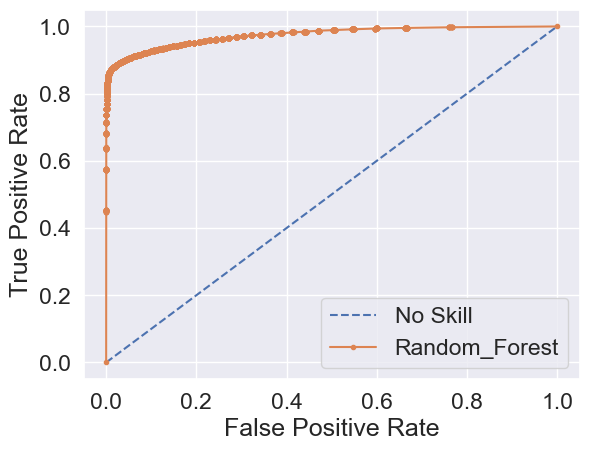

In [106]:
ns_probs = [0 for _ in range(len(y_val))]
rf_probs = Random_Forest.predict_proba(X_val)
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
rf_auc = roc_auc_score(y_val, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random_Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random_Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### precision - recall curve

Random_Forest: f1=0.927 auc=0.980


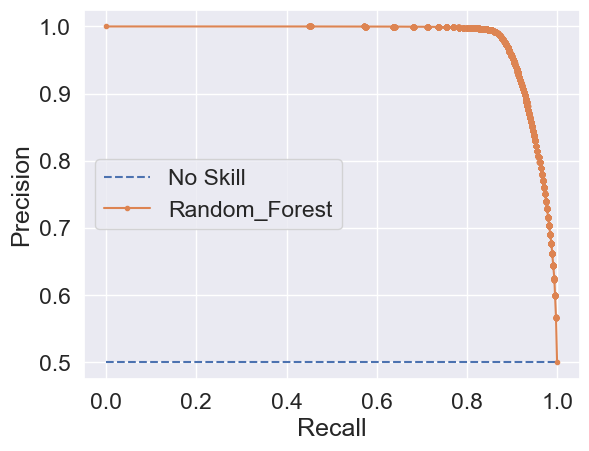

In [107]:
rf_probs = Random_Forest.predict_proba(X_val)
rf_probs = rf_probs[:, 1]
# predict class values
y_pred_rf = Random_Forest.predict(X_val)
rf_precision, rf_recall, _ = precision_recall_curve(y_val, rf_probs)
rf_f1, rf_auc = f1_score(y_val, y_pred_rf), auc(rf_recall, rf_precision)
# summarize scores
print('Random_Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random_Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Gradient Boosting Classifier

In [108]:
Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(X_train, y_train)
y_pred_gb = Gradient_Boosting.predict(X_val)

gb_Acu = accuracy_score(y_val, y_pred_gb)*100
gb_f1 = f1_score(y_val, y_pred_gb)
gb_roc_auc_score = roc_auc_score(y_val, Gradient_Boosting.predict_proba(X_val)[:,1])*100

print( "AUROC OF Sampled Gradient_Boosting  : ", roc_auc_score(y_val, Gradient_Boosting.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF Gradient_Boosting : ", gb_f1 )
print("Accuracy OF Gradient_Boosting : ", gb_Acu )

AUROC OF Sampled Gradient_Boosting  :  96.92578323283085
F1 SCORE OF Gradient_Boosting :  0.9098116400559194
Accuracy OF Gradient_Boosting :  91.2828581842103


In [109]:
cmG = confusion_matrix(y_val, y_pred_gb)
cmG

array([[53224,  3028],
       [ 6778, 49461]], dtype=int64)

# auc-roc curve

No Skill: ROC AUC=0.500
Gradient_Boosting: ROC AUC=0.969


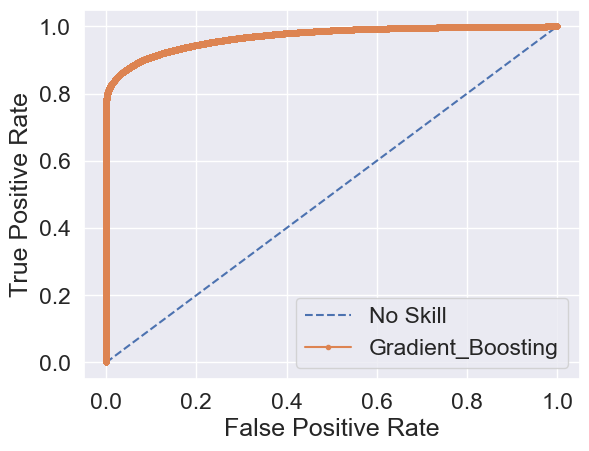

In [110]:
ns_probs = [0 for _ in range(len(y_val))]
gb_probs = Gradient_Boosting.predict_proba(X_val)
gb_probs = gb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
gb_auc = roc_auc_score(y_val, gb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient_Boosting: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_val, gb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient_Boosting')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# precision - recall curve

Gradient_Boosting: f1=0.910 auc=0.976


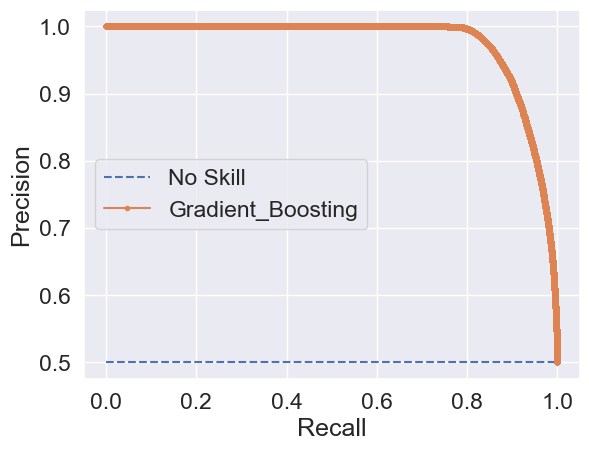

In [111]:
gb_probs = Gradient_Boosting.predict_proba(X_val)
gb_probs = gb_probs[:, 1]
# predict class values
y_pred_gb = Gradient_Boosting.predict(X_val)
gb_precision, gb_recall, _ = precision_recall_curve(y_val, gb_probs)
gb_f1, gb_auc = f1_score(y_val, y_pred_gb), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient_Boosting: f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(gb_recall, gb_precision, marker='.', label='Gradient_Boosting')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# XGBoost

In [112]:
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train)
y_pred_xgb = XGB_Classifier.predict(X_val)

xgb_Acu = accuracy_score(y_val, y_pred_xgb)*100
xgb_f1 = f1_score(y_val, y_pred_xgb)
xgb_roc_auc_score = roc_auc_score(y_val, XGB_Classifier.predict_proba(X_val)[:,1])*100

print("AUROC OF Sampled XGB_Classifier  : ", roc_auc_score(y_val, XGB_Classifier.predict_proba(X_val)[:,1])*100)
print("F1 SCORE OF XGB_Classifier : ", xgb_f1)
print("Accuracy OF XGB_Classifier : ", xgb_Acu)

AUROC OF Sampled XGB_Classifier  :  97.55335334915374
F1 SCORE OF XGB_Classifier :  0.9310949070148663
Accuracy OF XGB_Classifier :  93.49814651838814


In [113]:
# param_dist = {
#     'max_depth': [4, 6, 8, ],
#     'eta': [0.01, 0.1, 0.3],
#     'gamma': [ 0.1, 0.2, 0.3 ],
#     'min_child_weight': [2, 3,4],
#     'subsample': [0.5,0.6, 0.7],
#     'colsample_bytree': [0.5, 0.7, 1],
#     "reg_alpha": [0.01, 0.1, 1, 10, 100]}

# grid_search = GridSearchCV(estimator=XGB_Classifier,
#                                scoring='roc_auc',  # Minimize MSE
#                                param_grid = param_dist,
#                                )

# grid_search.fit(X_train, y_train,
#                  eval_set=[(X_train, y_train), (X_val, y_val)],
#                  verbose=1000)


# # Print the best hyperparameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# # Use the best model for prediction
# best_model = grid_search.best_estimator_
# y_pred_xgb = best_model.predict(X_val)

# xgb_Acu = accuracy_score(y_val, y_pred_xgb)*100
# xgb_f1 = f1_score(y_val, y_pred_xgb)

# print("AUROC OF Sampled XGB_Classifier  : ", roc_auc_score(y_val, XGB_Classifier.predict_proba(X_val)[:,1])*100)
# print("F1 SCORE OF XGB_Classifier : ", xgb_f1)
# print("Accuracy OF XGB_Classifier : ", xgb_Acu)

# auc-roc curve

No Skill: ROC AUC=0.500
Gradient_Boosting: ROC AUC=0.976


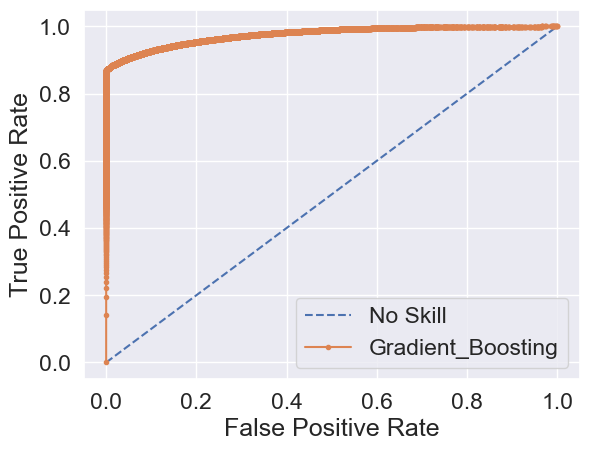

In [114]:
ns_probs = [0 for _ in range(len(y_val))]
xgb_probs = XGB_Classifier.predict_proba(X_val)
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
xgb_auc = roc_auc_score(y_val, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient_Boosting: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Gradient_Boosting')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# precision - recall curve

XGB_Classifier: f1=0.931 auc=0.981


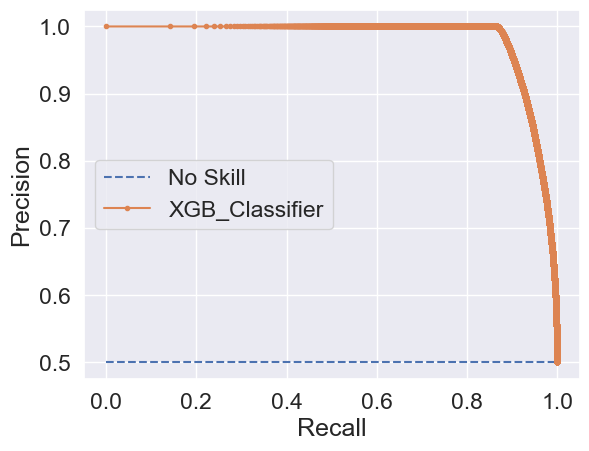

In [115]:
xgb_probs = XGB_Classifier.predict_proba(X_val)
xgb_probs = xgb_probs[:, 1]
# predict class values
y_pred_xgb = XGB_Classifier.predict(X_val)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_val, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_val, y_pred_xgb), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGB_Classifier: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGB_Classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Performance of all the models on hold-out dataset

In [66]:
final_data = pd.DataFrame({
    'Models':['Logistic_Regression','Decision_Tree','Random_Forest','Gradient_Boosting','XGB'],
    'Accuracy':[lr_f1,dt_f1,rf_f1,gb_f1,xgb_f1],
    "F1":[lr_Acu,dt_Acu,rf_Acu,gb_Acu,xgb_Acu],
    "AUROC":[lr_roc_auc_score,dt_roc_auc_score,rf_roc_auc_score,gb_roc_auc_score,xgb_roc_auc_score]
})

final_data

,Models,Accuracy,F1,AUROC
0,Logistic_Regression,0.758207,74.823764,81.813537
1,Decision_Tree,0.873148,87.764354,95.112926
2,Random_Forest,0.927481,93.007441,97.458920
3,Gradient_Boosting,0.909812,91.282858,96.925783
4,XGB,0.931095,93.498147,97.553353


# Feature importance , most import drivers of heart disease or attack

## Random Forest

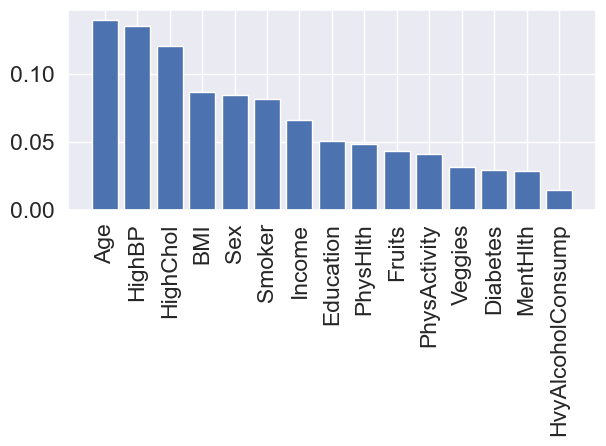

In [135]:
feature_names = X.columns
importances = Random_Forest.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.bar(sorted_feature_names, sorted_importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## XGBoost

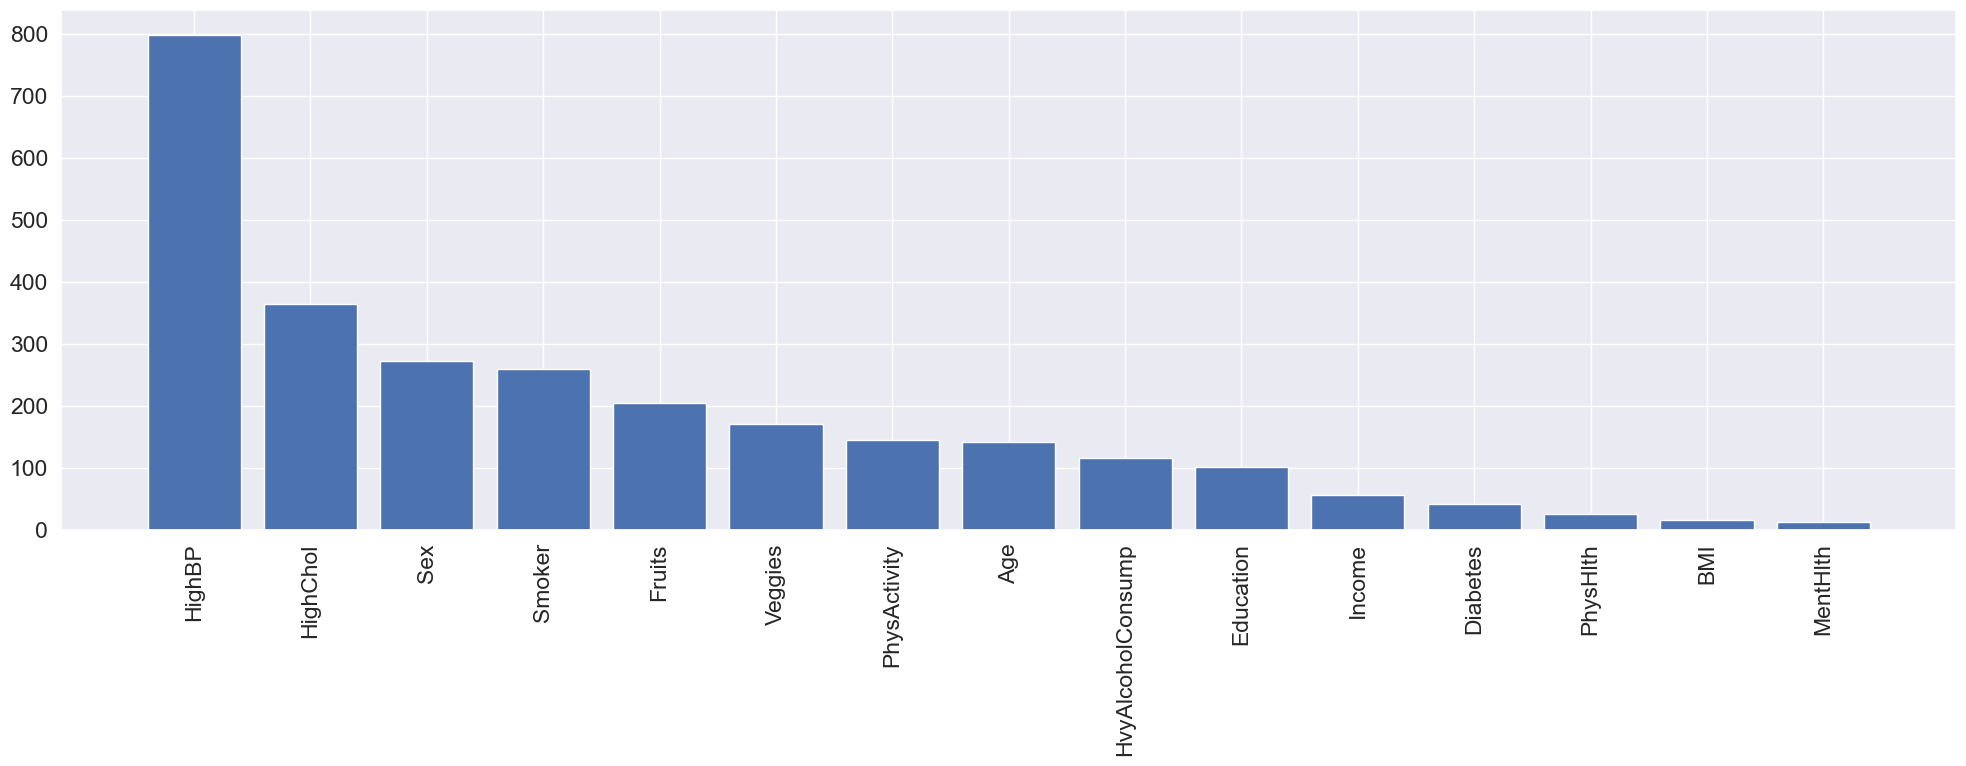

In [136]:
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = "gain"
importances = XGB_Classifier.get_booster().get_score(importance_type= f)
keys = list(importances.keys())
values = list(importances.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False).reset_index()
plt.bar(data["index"], data["score"])
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()